#### Algorithm training:

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
from numpy import mean

In [35]:
# Importing dataset and separating labels

train_data = pd.read_csv("D:\ML\Datasets\emails.csv")
y = train_data['spam']
train_data.drop(labels='spam', axis=1, inplace=True)

In [36]:
# Creating bag of words

vectorizer = CountVectorizer(stop_words=['subject'], max_features=500) 
                             #, strip_accents="unicode")
X = vectorizer.fit_transform(train_data.text)
features = vectorizer.get_feature_names() # to check feature names if required
X = X.toarray()

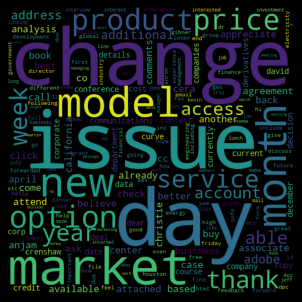

In [37]:
# Creating wordcloud

spam_wordcloud = WordCloud(width=512, height=512).generate(' '.join(features))
plt.figure(facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [114]:
model = XGBClassifier(n_estimators=50, scale_pos_weight=3, max_depth=8, learning_rate=0.3, verbosity=0, random_state=1
                      , reg_alpha=5, reg_lambda=5, use_label_encoder=False)
#cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, scoring='precision')
#, scoring='roc_auc'
#print('Mean ROC AUC: %.5f' % mean(scores))

In [115]:
# Making Predictions

predictions = cross_val_predict(model, X, y, cv=cv)

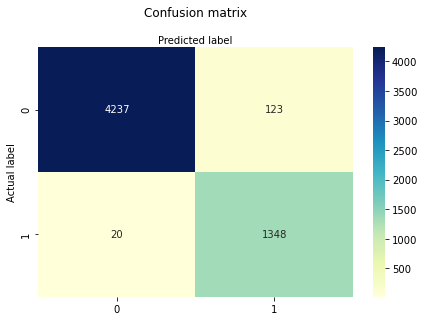

In [116]:
# Printing confusion matrix in the colored format seen below in output

cm = confusion_matrix(y, predictions)
cm
class_names=[0, 1] # names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [119]:
# Printing classification report

print("Classification Report:")
print(classification_report(y, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4360
           1       0.92      0.99      0.95      1368

    accuracy                           0.98      5728
   macro avg       0.96      0.98      0.97      5728
weighted avg       0.98      0.98      0.98      5728

